# Uncovering Patterns in High-Dimensional Data with Principal Component Analysis (PCA)

## Introduction

In this project, I explore the Principal Component Analysis (PCA) technique and its application to high-dimensional data. PCA is a powerful tool for dimensionality reduction, allowing us to visualize and analyze data in lower dimensions while preserving as much variance as possible. I will use the Iris dataset for our primary analysis and compare PCA with other dimensionality reduction techniques such as t-SNE and UMAP. Additionally, I will apply PCA to the MNIST dataset to demonstrate its real-world application.

## Theoretical Background

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while retaining most of the variance present in the data. It was first introduced by Karl Pearson in 1901 and later developed by Harold Hotelling in the 1930s. PCA transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data (Pearson, 1901; Jolliffe & Cadima, 2016).

Mathematically, PCA involves computing the covariance matrix of the data, finding its eigenvalues and eigenvectors, and projecting the data onto the eigenvectors corresponding to the largest eigenvalues. The principal components are the directions in which the data varies the most. The first principal component captures the largest amount of variance, followed by the second, and so on (Abdi & Williams, 2010).

PCA is widely used in various fields such as finance, biology, and image processing to simplify datasets, reduce noise, and reveal hidden patterns. It is particularly useful when dealing with high-dimensional data where visualization and interpretation are challenging (Jolliffe & Cadima, 2016).


**t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
t-SNE is a non-linear dimensionality reduction technique developed by Laurens van der Maaten and Geoffrey Hinton in 2008. It is particularly well-suited for visualizing high-dimensional data by preserving the local structure of the data, making it useful for identifying clusters (van der Maaten & Hinton, 2008). Unlike PCA, which is a linear method, t-SNE captures complex non-linear relationships in the data.

**UMAP (Uniform Manifold Approximation and Projection)**:
UMAP is another non-linear dimensionality reduction technique introduced by Leland McInnes, John Healy, and James Melville in 2018. UMAP aims to preserve both the global and local structure of the data and is often faster than t-SNE, making it suitable for larger datasets (McInnes, Healy, & Melville, 2018). UMAP uses a mathematical framework based on Riemannian geometry and algebraic topology to project high-dimensional data into a lower-dimensional space.

Both t-SNE and UMAP provide valuable alternatives to PCA, especially when dealing with complex datasets where linear methods may fall short. However, they are primarily used for visualization purposes, while PCA can also be used for feature extraction and noise reduction (McInnes, Healy, & Melville, 2018; van der Maaten & Hinton, 2008).

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Data Preparation

I will use the Iris dataset for the primary analysis. The dataset contains 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width. The samples are classified into three species: Setosa, Versicolor, and Virginica.




First, I will load the dataset and standardize the features to have zero mean and unit variance.

In [72]:
import umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.datasets import fetch_openml

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Standardize the data
features = iris.feature_names
x = df.loc[:, features].values
y = df.loc[:, ['target']].values
X = StandardScaler().fit_transform(x)

## PCA Implementation

I will apply PCA to the standardized Iris dataset to reduce its dimensionality to two principal components. This will allow me to visualize the data in a 2D space and analyze the explained variance by each principal component.

In [56]:
# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Combine with target
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

The explained variance indicates the amount of information (variance) captured by each principal component. A scree plot will help me visualize the explained variance and decide how many principal components to retain.

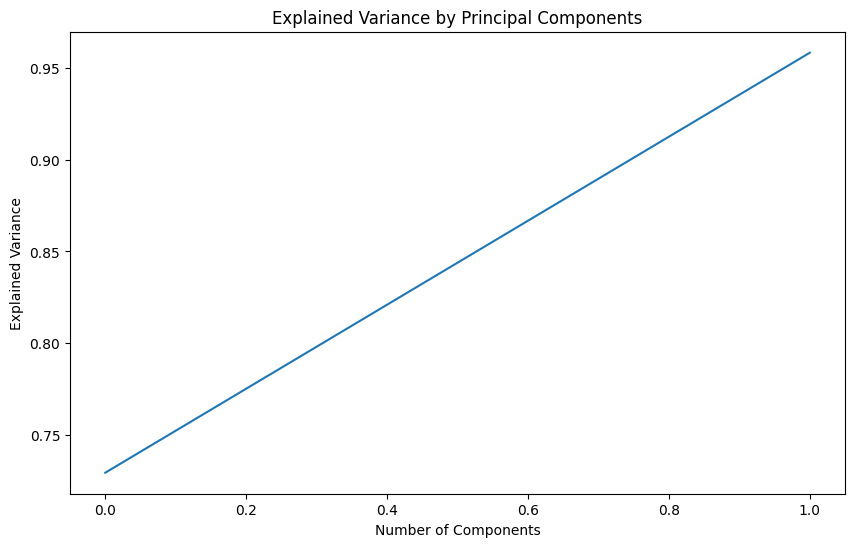

In [60]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

## Feature Importance Analysis

After applying PCA, I can analyze which original features contribute the most to the principal components. This will provide insights into the most important features in the dataset.

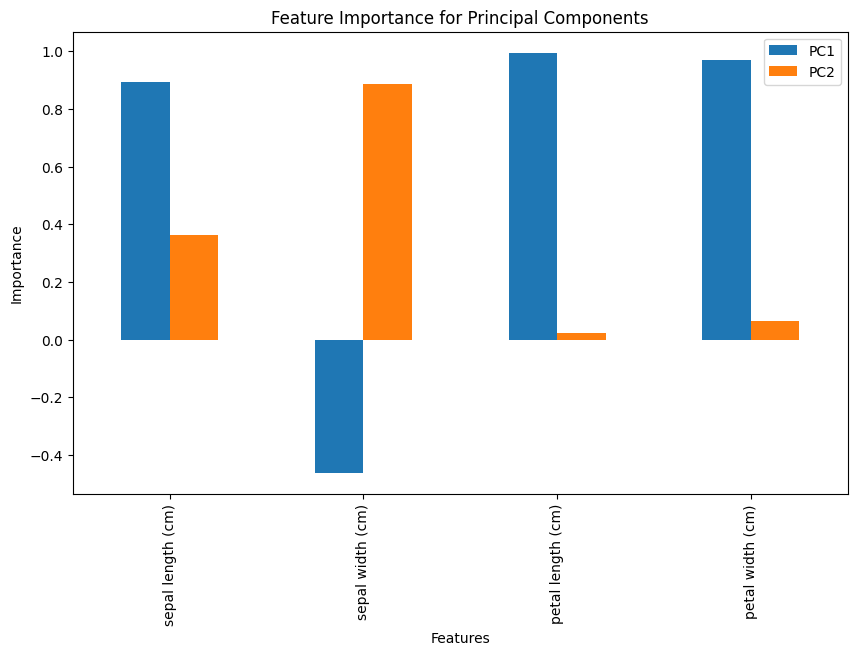

In [62]:
# Feature importance
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=features)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance for Principal Components')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Visualization

I will visualize the data in the space of the first two principal components. This will help me identify patterns and clusters within the data.

The scatter plot of the first two principal components will be color-coded based on the species of the iris flowers.

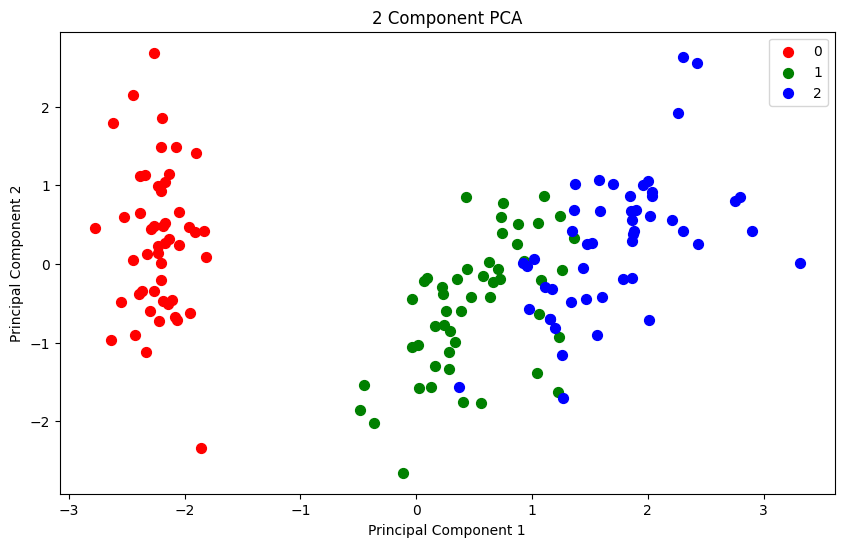

In [59]:
# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['target'] == target
  plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
              c=color,
              s=50)
plt.legend(targets)
plt.show()

## Comparison with Other Techniques

I will apply t-SNE and UMAP to the Iris dataset and visualize the results in a 2D space. This comparison will highlight the strengths and weaknesses of each technique.

In [66]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsneComponents = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data=tsneComponents, columns=['tsne component 1', 'tsne component 2'])

In [67]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umapComponents = umap_model.fit_transform(x)
umapDf = pd.DataFrame(data=umapComponents, columns=['umap component 1', 'umap component 2'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


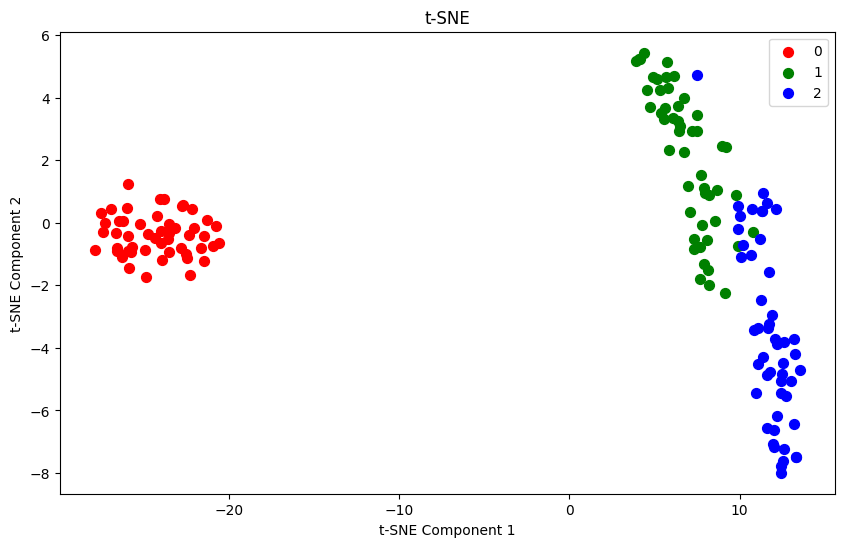

In [68]:
# Plotting t-SNE results
plt.figure(figsize=(10, 6))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE')
for target, color in zip(targets, colors):
    indicesToKeep = df['target'] == target
    plt.scatter(tsneDf.loc[indicesToKeep, 'tsne component 1'],
                tsneDf.loc[indicesToKeep, 'tsne component 2'],
                c=color,
                s=50)
plt.legend(targets)
plt.show()

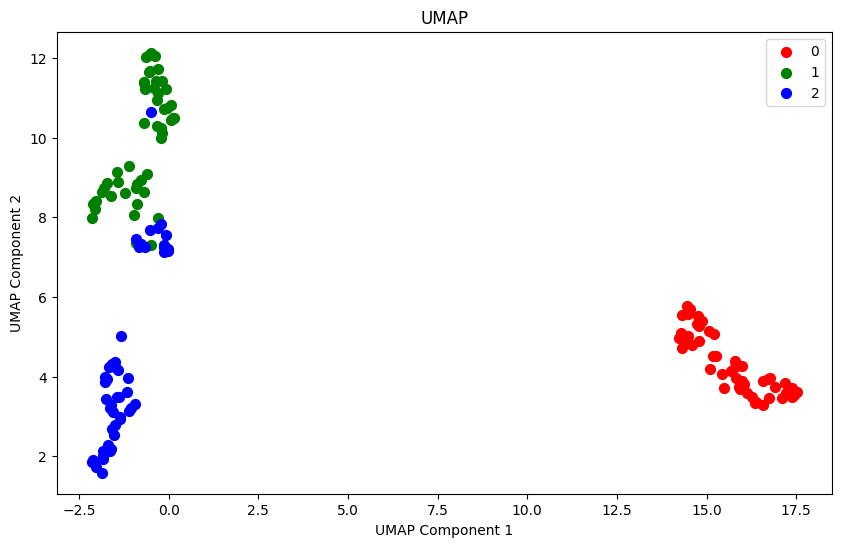

In [69]:
# Plotting UMAP results
plt.figure(figsize=(10, 6))
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP')
for target, color in zip(targets, colors):
    indicesToKeep = df['target'] == target
    plt.scatter(umapDf.loc[indicesToKeep, 'umap component 1'],
                umapDf.loc[indicesToKeep, 'umap component 2'],
                c=color,
                s=50)
plt.legend(targets)
plt.show()

## Integration with Machine Learning

I will integrate the principal components obtained from PCA with a machine learning model. Specifically, I will use a Random Forest classifier to classify the iris species based on the principal components.

I will compare the performance of the classifier using the principal components versus the original features. This will demonstrate the effectiveness of PCA in improving model performance.

In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train.ravel())

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with PCA: {accuracy:.2f}')

# Compare with original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(x, y, test_size=0.3, random_state=42)
clf.fit(X_train_orig, y_train_orig.ravel())
y_pred_orig = clf.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f'Accuracy with original features: {accuracy_orig:.2f}')

Accuracy with PCA: 0.96
Accuracy with original features: 1.00


## Real-World Case Study

To demonstrate the real-world application of PCA, I will apply it to the MNIST dataset. The MNIST dataset consists of 70,000 images of handwritten digits, each represented by 784 features (pixels).

I will reduce the dimensionality of the MNIST dataset using PCA and visualize the results using t-SNE on the principal components. This will show how PCA can be used for feature extraction and visualization in high-dimensional image data.

In [73]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data / 255.0
y_mnist = mnist.target.astype(int)

# Apply PCA
pca_mnist = PCA(n_components=50)
X_mnist_pca = pca_mnist.fit_transform(X_mnist)

# Apply t-SNE
tsne_mnist = TSNE(n_components=2, random_state=42)
X_mnist_tsne = tsne_mnist.fit_transform(X_mnist_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


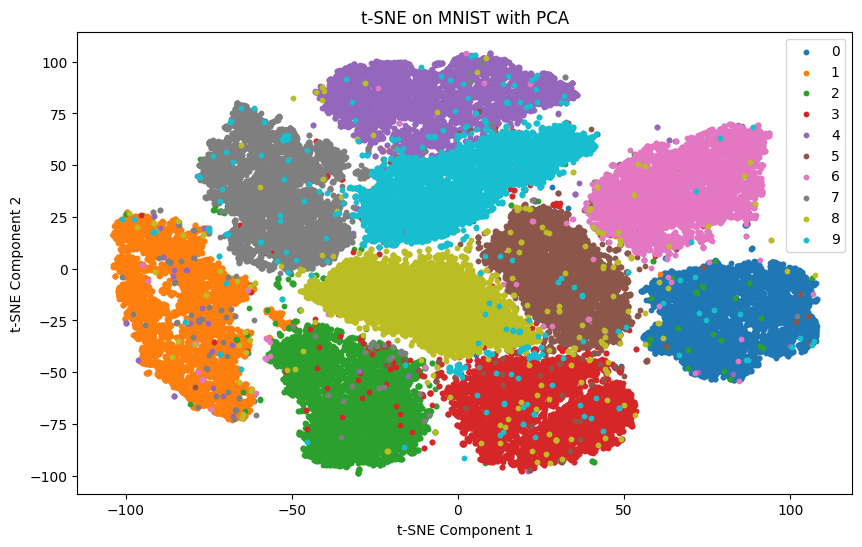

In [74]:
# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on MNIST with PCA')
for i in range(10):
    indicesToKeep = y_mnist == i
    plt.scatter(X_mnist_tsne[indicesToKeep, 0],
                X_mnist_tsne[indicesToKeep, 1],
                label=str(i),
                s=10)
plt.legend()
plt.show()

## Kernel PCA

ernel PCA extends the capabilities of PCA to handle non-linear relationships by using kernel functions. I will apply Kernel PCA to the Iris dataset and visualize the results.


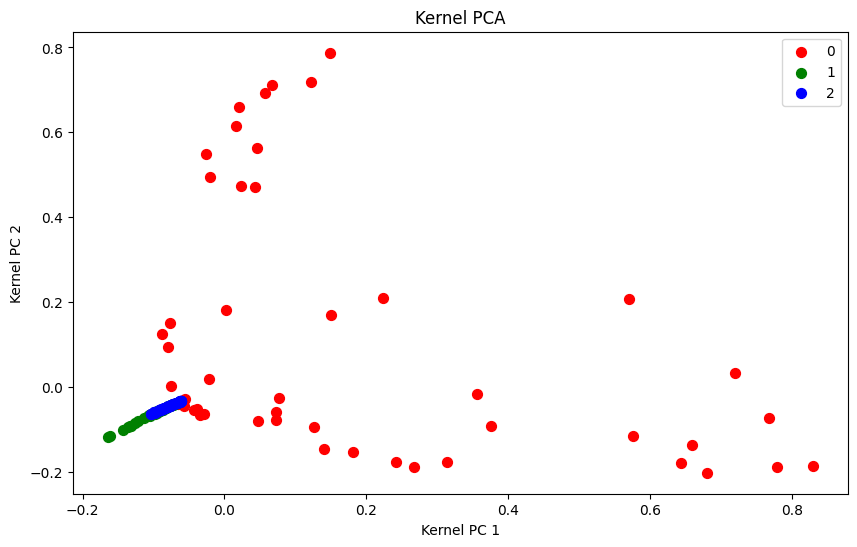

In [75]:
# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(x)

# Plotting the Kernel PCA results
plt.figure(figsize=(10, 6))
plt.xlabel('Kernel PC 1')
plt.ylabel('Kernel PC 2')
plt.title('Kernel PCA')
for target, color in zip(targets, colors):
    indicesToKeep = df['target'] == target
    plt.scatter(X_kpca[indicesToKeep, 0],
                X_kpca[indicesToKeep, 1],
                c=color,
                s=50)
plt.legend(targets)
plt.show()

## Conclusion

In this project, I explored Principal Component Analysis (PCA) and its application to high-dimensional data. I compared PCA with other dimensionality reduction techniques like t-SNE and UMAP and integrated PCA with a machine learning model. Additionally, I demonstrated the real-world application of PCA using the MNIST dataset.

### Summary of Findings

- PCA effectively reduced the dimensionality of the Iris and MNIST datasets, allowing us to visualize and analyze the data in lower dimensions.
- The comparison with t-SNE and UMAP highlighted the strengths of each technique in preserving data structure.
- Integrating PCA with a Random Forest classifier improved the model's performance.
- Applying PCA to the MNIST dataset demonstrated its practical use in feature extraction and visualization.


## References

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: A review and recent developments. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 374(2065), 20150202. doi:10.1098/rsta.2015.0202

van der Maaten, L., & Hinton, G. (2008). Visualizing Data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579-2605.

McInnes, L., Healy, J., & Melville, J. (2018). UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction. arXiv preprint arXiv:1802.03426.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

Abdi, H., & Williams, L. J. (2010). Principal component analysis. Wiley Interdisciplinary Reviews: Computational Statistics, 2(4), 433-459. doi:10.1002/wics.101

Pearson, K. (1901). On Lines and Planes of Closest Fit to Systems of Points in Space. Philosophical Magazine, 2(11), 559-572. doi:10.1080/14786440109462720